In [1]:
from matplotlib import pyplot as plt
import csv
import numpy as np
import pandas as pd
import seaborn as sns
from ast import literal_eval
sns.set()
sns.set_style('darkgrid')

In [90]:
def summary_statistics(df):
    atts = ['Age', 'Gen', 'Health', 'Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    summary = pd.DataFrame()
    for att in atts:
        col = pd.DataFrame(df['{}'.format(att)].values.tolist())
        summary['Avg {}'.format(att)] = col.mean(axis=1)
        summary['Std {}'.format(att)] = col.std(axis=1)
    return summary

def plot_stats(df):
    atts = ['Gen', 'Age', 'Health']
    stats = summary_statistics(df)
    if 'Epoch' in df.columns:
        steps = df['Epoch']
    else:
        steps = df['Step']
    living = df['Living']
    
    plt.figure(figsize=(10,6)) 
    plt.subplot(2,2,1)
    plt.plot(steps, living)
    plt.title('Living')
    for i in range(3):
        att = atts[i]
        plt.subplot(2,2,i+2)
        plt.plot(steps, stats['Avg {}'.format(att)])
        plt.fill_between(steps, stats['Avg {}'.format(att)]+stats['Std {}'.format(att)], stats['Avg {}'.format(att)]-stats['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
    plt.tight_layout()
    plt.show()

def plot_attributes(df):
    atts = ['Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    stats = summary_statistics(df)
    if 'Epoch' in df.columns:
        steps = df['Epoch']
    else:
        steps = df['Step']

    plt.figure(figsize=(10,6))
    for i in range(6):
        att = atts[i]
        plt.subplot(3,2,i+1)
        plt.plot(steps, stats['Avg {}'.format(att)])
        plt.fill_between(steps, stats['Avg {}'.format(att)]+stats['Std {}'.format(att)], stats['Avg {}'.format(att)]-stats['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
    plt.tight_layout()
    plt.show()

def plot_last_epoch(df, epoch=1):
    lastage = df['Age'].iloc[-epoch]
    lastgen = df['Gen'].iloc[-epoch]
    plt.figure(figsize=(10,6))
    plt.subplot(2,1,1)
    plt.scatter(range(len(lastage)), lastage)
    plt.title('All Ages in Epoch {}'.format(str(df['Age'].size-epoch)))
    plt.subplot(2,1,2)
    plt.scatter(range(len(lastgen)), lastgen)
    plt.title('All Generations in Epoch {}'.format(str(df['Gen'].size-epoch)))
    plt.tight_layout()
    # plt.savefig('images/trial22_lastepoch.png')
    plt.show()

def plot_evolution(df, noodle_num, epoch=1):
    ancestors = df['Ancestors']
    dna = ancestors[len(ancestors)-epoch][noodle_num]
    zipped = list(zip(*dna))
    sizes = zipped[0]
    speeds = zipped[1]
    sights = [s/10 for s in zipped[2]]
    views = [v/10 for v in zipped[3]]
    reps = [r/10 for r in zipped[4]]
    gens = len(dna)
    plt.plot(range(gens), sizes, range(gens), speeds, range(gens), sights, range(gens), views, range(gens), reps)
    plt.legend(['Size', 'Speed', 'Sight/10', 'View/10', 'Rep/10'], loc=3)
    plt.savefig('images/trial22_evolution.png')
    return 
    
def count_common_ancestor(df, epoch=1, gen=0):
    ancestors = df['Ancestors']
    common = {}
    for tree in ancestors[len(ancestors)-epoch]:
        if len(tree) > gen:
            if str(tree[gen]) in common:
                common[str(tree[gen])] += 1
            else:
                common[str(tree[gen])] = 1
    return common

def plot_both_stats(noodles, predators):
    steps = noodles['Epoch']
    living_noods = noodles['Living']
    living_preds = predators['Living']
    atts = ['Age', 'Gen', 'Health']
    noods = summary_statistics(noodles)
    preds = summary_statistics(predators)
    noods.fillna(0,inplace=True)
    preds.fillna(0,inplace=True)

    plt.figure(figsize=(10,6))
    plt.subplot(2,2,1)
    plt.plot(steps, living_noods, steps, living_preds)
    plt.title('Living Creatures')
    plt.legend(['Noodles', 'Preds'], loc='northwest')
    for i in range(3):
        att = atts[i]
        plt.subplot(2,2,i+2)
        plt.plot(steps, noods['Avg {}'.format(att)], steps, preds['Avg {}'.format(att)])
        plt.fill_between(steps, noods['Avg {}'.format(att)]+noods['Std {}'.format(att)], noods['Avg {}'.format(att)]-noods['Std {}'.format(att)], alpha=0.15)
        plt.fill_between(steps, preds['Avg {}'.format(att)]+preds['Std {}'.format(att)], preds['Avg {}'.format(att)]-preds['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
        plt.legend(['Noodles', 'Preds'], loc='northwest')
    plt.tight_layout()
    plt.show()

def plot_both_attributes(noodles, predators, savefile=''):
    steps = noodles['Epoch']
    atts = ['Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    noods = summary_statistics(noodles)
    preds = summary_statistics(predators)
    # noods.fillna(0,inplace=True)
    # preds.fillna(0,inplace=True)

    plt.figure(figsize=(20,12))
    for i in range(6):
        att = atts[i]
        plt.subplot(3,2,i+1)
        plt.plot(steps, noods['Avg {}'.format(att)], steps, preds['Avg {}'.format(att)])
        plt.fill_between(steps, noods['Avg {}'.format(att)]+noods['Std {}'.format(att)], noods['Avg {}'.format(att)]-noods['Std {}'.format(att)], alpha=0.15)
        plt.fill_between(steps, preds['Avg {}'.format(att)]+preds['Std {}'.format(att)], preds['Avg {}'.format(att)]-preds['Std {}'.format(att)], alpha=0.15)
        plt.title('Average {}'.format(att))
        plt.legend(['Noodles', 'Preds'], loc=2)
        plt.xlabel('Epoch')
        plt.ylabel('{}'.format(att))
    plt.tight_layout()
    if savefile is not '':
        plt.savefig('images/{}.png'.format(savefile))
    plt.show()
    
def old_plot_noodles(df):
    plt.figure(figsize=(10,6)) 
    step = df['Step']
    thangs = ['Living Noodles', 'Age', 'Dead Noodles', 'Health']
    for i in range(0,4):
        plt.subplot(2,2,i+1)
        plt.plot(step, df['{}'.format(thangs[i])])
        plt.title('{}'.format(thangs[i]))
    plt.tight_layout()
    # plt.savefig('images/trial13_living.png')
    plt.show()

def old_plot_stats(df):
    plt.figure(figsize=(10,6))
    step = df['Step']
    thangs = ['Size', 'Speed', 'Sight', 'View', 'Rep', 'Loss']
    for i in range(0,6):
        plt.subplot(3,2,i+1)
        plt.plot(step, df['{}'.format(thangs[i])])
        plt.title('{}'.format(thangs[i]))
    plt.tight_layout()
    # plt.savefig('images/trial13_attributes.png')
    plt.show()

In [63]:
# infile = 'data/noodle_output.csv'
# infile = 'data/pred_output.csv'
# infile = 'data/noodle_checkpoint.csv'
# infile = 'data/pred_checkpoint.csv'
infile = 'data/noodle_trial22.csv'

df = pd.read_csv(infile, converters={'Age': literal_eval, 'Gen': literal_eval, 'Health': literal_eval, 'Size': literal_eval, 'Speed': literal_eval, 'Sight': literal_eval, 'View': literal_eval, 'Rep': literal_eval, 'Loss': literal_eval, 'Ancestors': literal_eval})
df.head()

,Epoch,Living,Age,Gen,Health,Size,Speed,Sight,View,Rep,Loss,Ancestors
0,1,91,"[501, 501, 501, 501, 501, 501, 501, 501, 501, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[50.00000000000139, 54.99999999999912, 90.0000...","[6, 9, 7, 10, 8, 6, 7, 7, 6, 9, 7, 6, 7, 6, 10...","[2, 1, 1, 4, 3, 1, 4, 4, 2, 1, 3, 2, 2, 2, 1, ...","[57, 61, 129, 132, 133, 37, 180, 97, 120, 147,...","[32, 42, 49, 98, 85, 67, 80, 27, 64, 99, 85, 5...","[21, 28, 16, 34, 23, 22, 23, 33, 22, 35, 23, 2...","[7, 12, 11, 25, 17, 8, 21, 15, 11, 18, 13, 11,...",[]
1,2,88,"[1001, 1001, 1001, 1001, 1001, 1001, 1001, 100...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[15.00000000000125, 60.00000000000057, 146.25,...","[6, 7, 10, 8, 6, 7, 6, 7, 6, 6, 6, 8, 7, 6, 7,...","[2, 1, 4, 3, 1, 4, 2, 3, 2, 2, 3, 2, 1, 1, 3, ...","[57, 129, 132, 133, 37, 180, 120, 51, 120, 71,...","[32, 49, 98, 85, 67, 80, 64, 85, 58, 38, 78, 5...","[21, 16, 34, 23, 22, 23, 22, 23, 22, 16, 31, 3...","[7, 11, 25, 17, 8, 21, 11, 13, 11, 8, 11, 14, ...",[]
2,3,63,"[1501, 1501, 1501, 1501, 1501, 1501, 1501, 150...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[30.000000000000853, 163.0, 151.85000000000244...","[7, 10, 8, 7, 6, 6, 6, 8, 6, 7, 8, 6, 10, 10, ...","[1, 4, 3, 4, 2, 2, 3, 2, 1, 3, 3, 2, 3, 3, 3, ...","[129, 132, 133, 180, 120, 71, 48, 128, 197, 10...","[49, 98, 85, 80, 58, 38, 78, 57, 25, 119, 115,...","[16, 34, 23, 23, 22, 16, 31, 34, 31, 21, 19, 1...","[11, 25, 17, 21, 11, 8, 11, 14, 11, 16, 20, 13...",[]
3,4,58,"[2001, 2001, 2001, 2001, 2001, 2001, 2001, 200...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[197.5, 158.30000000000013, 96.48000000000594,...","[10, 8, 7, 6, 6, 8, 7, 8, 6, 10, 9, 7, 9, 9, 1...","[4, 3, 4, 2, 3, 2, 3, 3, 2, 3, 3, 4, 3, 4, 3, ...","[132, 133, 180, 71, 48, 128, 103, 170, 157, 67...","[98, 85, 80, 38, 78, 57, 119, 115, 70, 58, 70,...","[34, 23, 23, 16, 31, 34, 21, 19, 16, 19, 27, 3...","[25, 17, 21, 8, 11, 14, 16, 20, 13, 17, 16, 19...",[]
4,5,43,"[2501, 2501, 2501, 2501, 2501, 2501, 2501, 250...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[196.0, 156.26000000000028, 137.2699999999999,...","[10, 8, 7, 7, 8, 6, 9, 7, 9, 10, 9, 6, 8, 6, 7...","[4, 3, 4, 3, 3, 2, 3, 4, 4, 3, 4, 3, 3, 2, 3, ...","[132, 133, 180, 103, 170, 157, 80, 115, 171, 1...","[98, 85, 80, 119, 115, 70, 70, 91, 120, 40, 10...","[34, 23, 23, 21, 19, 16, 27, 32, 15, 17, 18, 3...","[25, 17, 21, 16, 20, 13, 16, 19, 26, 19, 25, 1...",[]


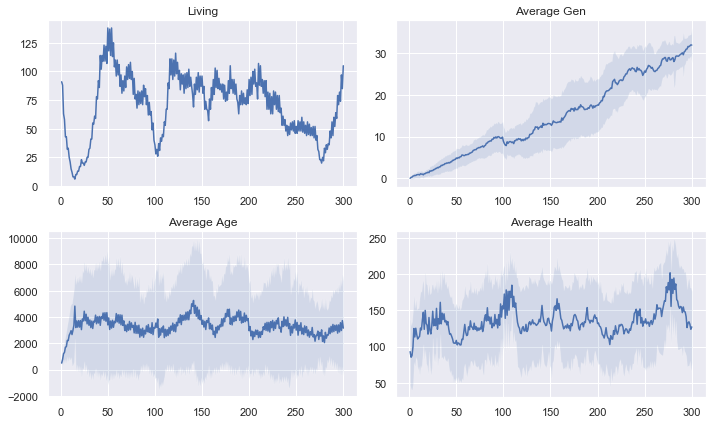

In [64]:
plot_stats(df)

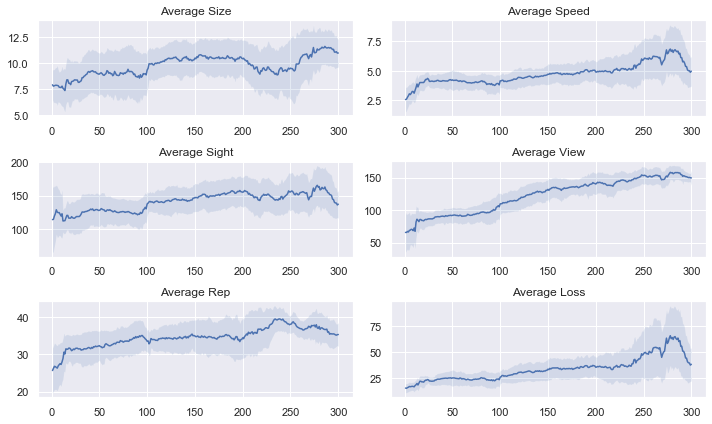

In [65]:
plot_attributes(df)

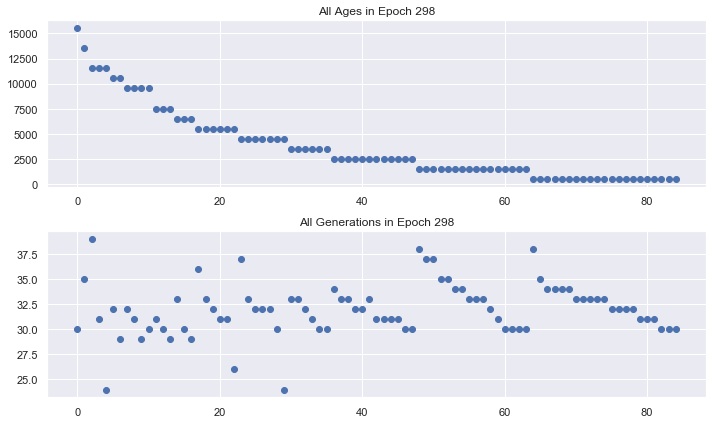

In [70]:
plot_last_epoch(df,2)

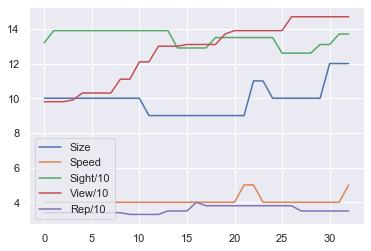

In [91]:
plot_evolution(df,6)

In [117]:
count_common_ancestor(df,1,25)

{'[10, 4, 126, 139, 38]': 85,
 '[8, 4, 121, 134, 40]': 7,
 '[8, 5, 140, 139, 38]': 2,
 '[11, 8, 166, 169, 43]': 2,
 '[12, 8, 196, 167, 36]': 4,
 '[13, 8, 199, 160, 37]': 2}

In [105]:
predfile = 'data/pred_output.csv'
pred = pd.read_csv(predfile, converters={'Age': literal_eval, 'Gen': literal_eval, 'Health': literal_eval, 'Size': literal_eval, 'Speed': literal_eval, 'Sight': literal_eval, 'View': literal_eval, 'Rep': literal_eval, 'Loss': literal_eval, 'Ancestors': literal_eval})

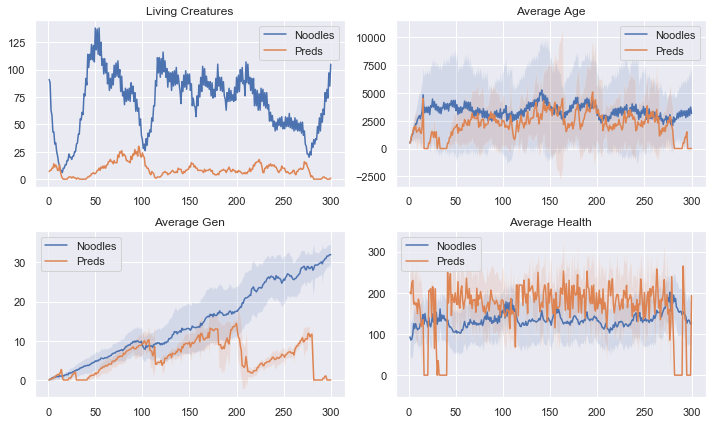

In [106]:
plot_both_stats(df, pred)

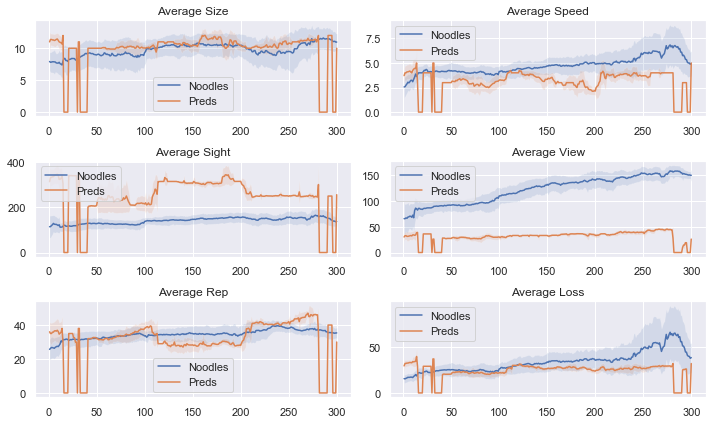

In [107]:
plot_both_attributes(df, pred)

In [108]:
trial_num = 22
df.to_csv('data/noodle_trial{}.csv'.format(trial_num), index=False)

In [109]:
pred.to_csv('data/pred_trial{}.csv'.format(trial_num), index=False)

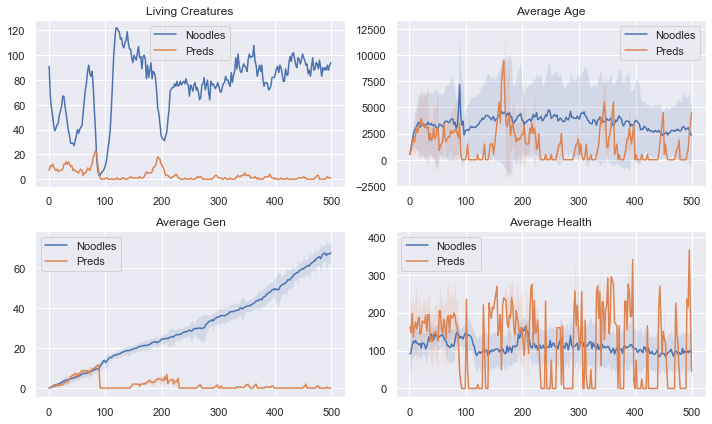

In [101]:
plot_both_stats(rep_nood, rep_pred)

In [63]:
nood = pd.read_csv('data/noodle_trial22.csv', converters={'Age': literal_eval, 'Gen': literal_eval, 'Health': literal_eval, 'Size': literal_eval, 'Speed': literal_eval, 'Sight': literal_eval, 'View': literal_eval, 'Rep': literal_eval, 'Loss': literal_eval, 'Ancestors': literal_eval})
pred = pd.read_csv('data/pred_trial22.csv', converters={'Age': literal_eval, 'Gen': literal_eval, 'Health': literal_eval, 'Size': literal_eval, 'Speed': literal_eval, 'Sight': literal_eval, 'View': literal_eval, 'Rep': literal_eval, 'Loss': literal_eval, 'Ancestors': literal_eval})

In [64]:
halfnood = nood[::2]
halfpred = pred[::2]
noodstats = summary_statistics(nood)
predstats = summary_statistics(pred)
steps = nood['Epoch']

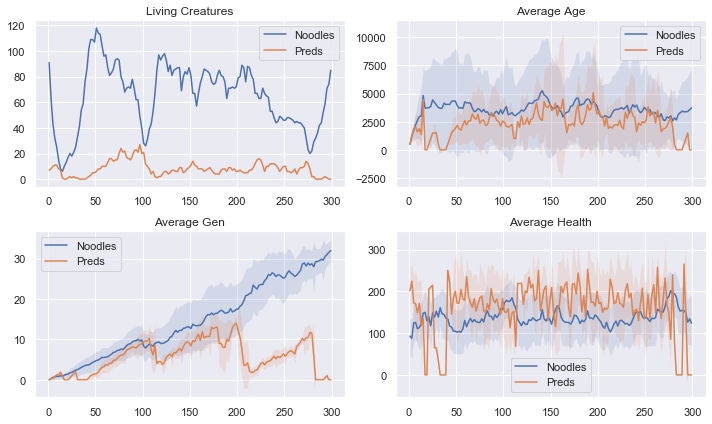

In [17]:
plot_both_stats(halfnood, halfpred)

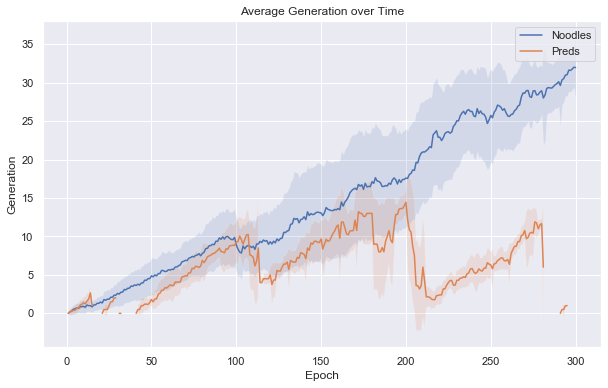

In [40]:
plt.figure(figsize=(10,6))
plt.plot(steps, noodstats['Avg Gen'], steps, predstats['Avg Gen'])
plt.fill_between(steps, noodstats['Avg Gen']+noodstats['Std Gen'], noodstats['Avg Gen']-noodstats['Std Gen'], alpha=0.15)
plt.fill_between(steps, predstats['Avg Gen']+predstats['Std Gen'], predstats['Avg Gen']-predstats['Std Gen'], alpha=0.15)
plt.title('Average Generation over Time')
plt.xlabel('Epoch')
plt.ylabel('Generation')
plt.legend(['Noodles', 'Preds'])
plt.savefig('images/trial22_gen.png')

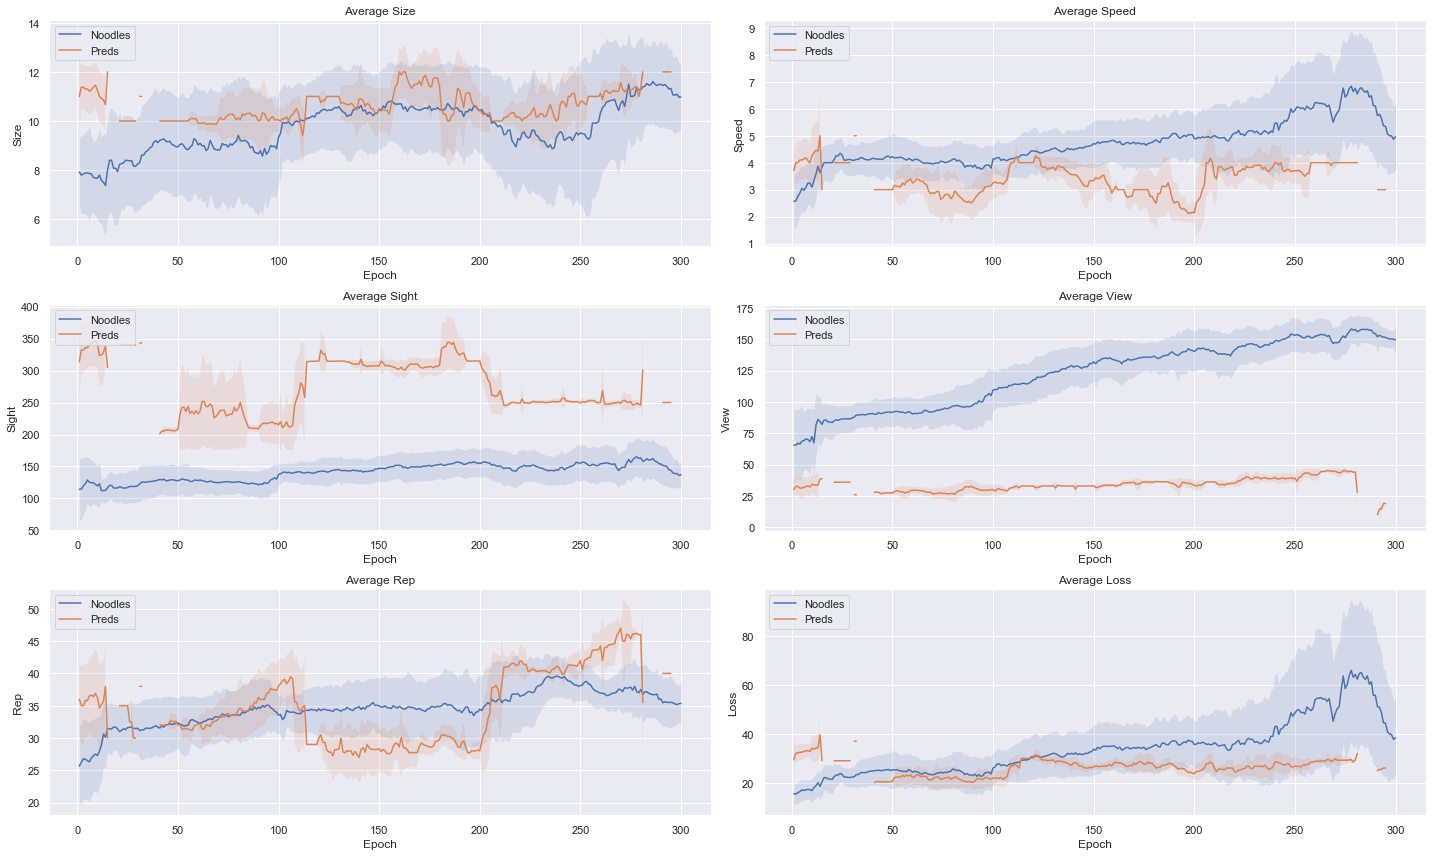

In [65]:
plot_both_attributes(nood, pred, 'trial22_attributes')